In [1]:
import sys
sys.path.append("../") 

2 Model Building and Training

1 Split data using stratified train-test split

In [2]:
from src.data_preprocessor import DataPreprocessor
import pandas as pd

df = pd.read_csv("../data/processed/Fraud_data_cleaned.csv")
# Create preprocessor
preprocessor = DataPreprocessor(df, target_col="class")

# Preprocess data
df_clean = preprocessor.preprocess()

# Train-test split
X_train, X_test, y_train, y_test = preprocessor.split()

print(X_train.shape, X_test.shape)


(120889, 14) (30223, 14)


2 BaselineModel (Logistic Regression)

In [3]:
from src.baseline_model import BaselineModel

baseline = BaselineModel()

# Train
baseline.train(X_train, y_train)

# Evaluate
baseline_results = baseline.evaluate(X_test, y_test)

print("Baseline Results:", baseline_results)


Baseline Results: {'model_name': 'Logistic Regression', 'auc_pr': 0.32102094623365646, 'f1': 0.2858002859507864, 'confusion_matrix': array([[18833,  8560],
       [  931,  1899]]), 'classification_report': {'0': {'precision': 0.9528941509815827, 'recall': 0.6875114080239477, 'f1-score': 0.7987361367347372, 'support': 27393.0}, '1': {'precision': 0.18156611530739075, 'recall': 0.6710247349823322, 'f1-score': 0.2858002859507864, 'support': 2830.0}, 'accuracy': 0.6859676405386627, 'macro avg': {'precision': 0.5672301331444867, 'recall': 0.67926807150314, 'f1-score': 0.5422682113427618, 'support': 30223.0}, 'weighted avg': {'precision': 0.8806690793157003, 'recall': 0.6859676405386627, 'f1-score': 0.7507062105950891, 'support': 30223.0}}}


Baseline Logistic Regression Results:

AUC-PR = 0.32 → model struggles to separate fraud from non-fraud.

F1 (fraud) = 0.29 → low balance of precision and recall for fraud detection.

Confusion Matrix:

False negatives = 931 (fraud missed)

False positives = 8,560 (non-fraud wrongly flagged)

Precision (fraud) = 0.18, Recall (fraud) = 0.67 → detects some frauds but most predictions are wrong.

Accuracy = 0.686 → misleading due to class imbalance.

Takeaway: Logistic Regression favors non-fraud; not reliable for fraud detection. Next step: try ensemble models and resampling techniques.

3 EnsembleModel (Random Forest / XGBoost / LightGBM)

In [ ]:
from src.ensemble_model import EnsembleModel

ensemble = EnsembleModel(model_type="rf")   # "rf"
ensemble.train(X_train, y_train)
ensemble_results = ensemble.evaluate(X_test, y_test)
print("Ensemble Results:", ensemble_results)


Ensemble Results: {'model_name': 'RandomForestClassifier', 'auc_pr': 0.6224845576444401, 'f1': 0.6760180995475114, 'confusion_matrix': array([[27297,    96],
       [ 1336,  1494]]), 'classification_report': {'0': {'precision': 0.9533405511123528, 'recall': 0.9964954550432592, 'f1-score': 0.9744404383679006, 'support': 27393.0}, '1': {'precision': 0.939622641509434, 'recall': 0.5279151943462898, 'f1-score': 0.6760180995475114, 'support': 2830.0}, 'accuracy': 0.9526188664262317, 'macro avg': {'precision': 0.9464815963108935, 'recall': 0.7622053246947744, 'f1-score': 0.825229268957706, 'support': 30223.0}, 'weighted avg': {'precision': 0.952056043149005, 'recall': 0.9526188664262317, 'f1-score': 0.9464969774652204, 'support': 30223.0}}}


Ensemble Model (Random Forest) Results:

AUC-PR = 0.622 → much better at distinguishing fraud than baseline.

F1 (fraud) = 0.676 → good balance of precision and recall for fraud detection.

Confusion Matrix:

False negatives = 1,336 (fraud missed)

False positives = 96 (non-fraud wrongly flagged)

Precision (fraud) = 0.94, Recall (fraud) = 0.53 → most predicted frauds are correct, but ~47% of actual frauds are still missed.

Accuracy = 0.953 → improved, but slightly misleading due to imbalance.

Takeaway: Random Forest strongly outperforms baseline Logistic Regression, especially in identifying fraud, though recall can still be improved.

In [ ]:
ensemble = EnsembleModel(model_type="xgb") # "xgb"
ensemble.train(X_train, y_train)
ensemble_results = ensemble.evaluate(X_test, y_test)
print("Ensemble Results:", ensemble_results)

Ensemble Results: {'model_name': 'XGBClassifier', 'auc_pr': 0.6133590394471897, 'f1': 0.6853339453752582, 'confusion_matrix': array([[27359,    34],
       [ 1337,  1493]]), 'classification_report': {'0': {'precision': 0.9534081405073878, 'recall': 0.9987588069944876, 'f1-score': 0.9755567045231686, 'support': 27393.0}, '1': {'precision': 0.9777341191879503, 'recall': 0.5275618374558304, 'f1-score': 0.6853339453752582, 'support': 2830.0}, 'accuracy': 0.9546371968368461, 'macro avg': {'precision': 0.965571129847669, 'recall': 0.7631603222251591, 'f1-score': 0.8304453249492134, 'support': 30223.0}, 'weighted avg': {'precision': 0.9556859593759974, 'recall': 0.9546371968368461, 'f1-score': 0.9483810300901677, 'support': 30223.0}}}


Ensemble Model (XGBoost) Results:

AUC-PR = 0.613 → good ability to distinguish fraud, slightly lower than Random Forest.

F1 (fraud) = 0.685 → slightly better balance of precision and recall for fraud detection compared to RF.

Confusion Matrix:

False negatives = 1,337 (fraud missed)

False positives = 34 (non-fraud wrongly flagged)

Precision (fraud) = 0.978, Recall (fraud) = 0.528 → almost all predicted frauds are correct, but ~47% of actual frauds are still missed.

Accuracy = 0.955 → very high, but slightly biased by class imbalance.

Takeaway: XGBoost slightly outperforms Random Forest in F1-score and precision for fraud, while keeping false positives extremely low. Recall for fraud is still moderate, so threshold tuning or resampling could improve detection further.

In [ ]:
ensemble = EnsembleModel(model_type="lgbm")  # "lgbm"
ensemble.train(X_train, y_train)
ensemble_results = ensemble.evaluate(X_test, y_test)
print("Ensemble Results:", ensemble_results)

[LightGBM] [Info] Number of positive: 11321, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 120889, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093648 -> initscore=-2.269886
[LightGBM] [Info] Start training from score -2.269886
Ensemble Results: {'model_name': 'LGBMClassifier', 'auc_pr': 0.6125243092498471, 'f1': 0.6851766865534649, 'confusion_matrix': array([[27358,    35],
       [ 1337,  1493]]), 'classification_report': {'0': {'precision': 0.9534065168147761, 'recall': 0.9987223013178549, 'f1-score': 0.9755384395949223, 'support': 27393.0}, '1': {'precision': 0.9770942408376964, 'recall': 0.5275618374558304, 'f1-score': 0.6851766865534649, 'support': 2830.

Ensemble Model (LightGBM) Results:

AUC-PR = 0.613 → similar to XGBoost; decent ability to distinguish fraud.

F1 (fraud) = 0.685 → good balance of precision and recall for fraud detection.

Confusion Matrix:

False negatives = 1,337 (fraud missed)

False positives = 35 (non-fraud wrongly flagged)

Precision (fraud) = 0.977, Recall (fraud) = 0.528 → almost all predicted frauds are correct, but ~47% of actual frauds are still missed.

Accuracy = 0.955 → very high, though slightly biased by class imbalance.

Takeaway: LightGBM performs very similarly to XGBoost — high precision and F1 for fraud, very few false positives, but recall can still be improved with threshold tuning or resampling.

4 ModelCrossValidator

In [9]:
from src.cross_validation import ModelCrossValidator

cv = ModelCrossValidator(model=baseline, k=5)

cv_results = cv.run(X_train, y_train)

print("Cross Validation Results:", cv_results)


Cross Validation Results: {'auc_pr_mean': 0.3340988538345725, 'auc_pr_std': 0.00764925625987444, 'f1_mean': 0.29116743929628985, 'f1_std': 0.003769339402204781}


5 ModelComparer

In [10]:
from src.model_comparer import ModelComparer

comparer = ModelComparer([baseline_results, ensemble_results])

ranked_models = comparer.compare()

print("Best Model:", ranked_models[0])
print("All Ranked:", ranked_models)


Best Model: {'model_name': 'LGBMClassifier', 'auc_pr': 0.6125243092498471, 'f1': 0.6851766865534649, 'confusion_matrix': array([[27358,    35],
       [ 1337,  1493]]), 'classification_report': {'0': {'precision': 0.9534065168147761, 'recall': 0.9987223013178549, 'f1-score': 0.9755384395949223, 'support': 27393.0}, '1': {'precision': 0.9770942408376964, 'recall': 0.5275618374558304, 'f1-score': 0.6851766865534649, 'support': 2830.0}, 'accuracy': 0.9546041094530655, 'macro avg': {'precision': 0.9652503788262362, 'recall': 0.7631420693868427, 'f1-score': 0.8303575630741935, 'support': 30223.0}, 'weighted avg': {'precision': 0.9556245712430215, 'recall': 0.9546041094530655, 'f1-score': 0.9483497501495554, 'support': 30223.0}}}
All Ranked: [{'model_name': 'LGBMClassifier', 'auc_pr': 0.6125243092498471, 'f1': 0.6851766865534649, 'confusion_matrix': array([[27358,    35],
       [ 1337,  1493]]), 'classification_report': {'0': {'precision': 0.9534065168147761, 'recall': 0.9987223013178549, '

Best Model: LGBMClassifier

AUC-PR = 0.613 → strong ability to distinguish fraud cases.

F1 (fraud) = 0.685 → good balance between precision and recall.

Precision (fraud) = 0.977, Recall (fraud) = 0.528 → almost all predicted frauds are correct, but ~47% of actual frauds are still missed.

Confusion Matrix:

False negatives = 1,337 (frauds missed)

False positives = 35 (non-frauds wrongly flagged)

Accuracy = 0.955 → very high, though slightly biased by class imbalance.

Takeaway: LightGBM outperforms Logistic Regression significantly, especially for fraud detection, with very few false positives and high F1-score. Recall can be improved, but overall it’s the most reliable model.

| Model               | AUC-PR | F1 (fraud) | Precision (fraud) | Recall (fraud) | Accuracy |
| ------------------- | ------ | ---------- | ----------------- | -------------- | -------- |
| LGBMClassifier      | 0.613  | 0.685      | 0.977             | 0.528          | 0.955    |
| Logistic Regression | 0.321  | 0.286      | 0.182             | 0.671          | 0.686    |

Observation:

Logistic Regression is weak for fraud detection (low precision and F1).

LightGBM provides much better precision, F1, and overall performance, making it the best choice for this task.


Visualizations

C:\Users\Abas\AppData\Local\Temp\ipykernel_20304\1251054226.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=axes[i], palette="viridis")
C:\Users\Abas\AppData\Local\Temp\ipykernel_20304\1251054226.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)
C:\Users\Abas\AppData\Local\Temp\ipykernel_20304\1251054226.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=axes[i], palette="viridis")
C:\Users\Abas\AppData\Local\Temp\ipykernel_20304\1251054226.py:28: UserWarning: set_tickl

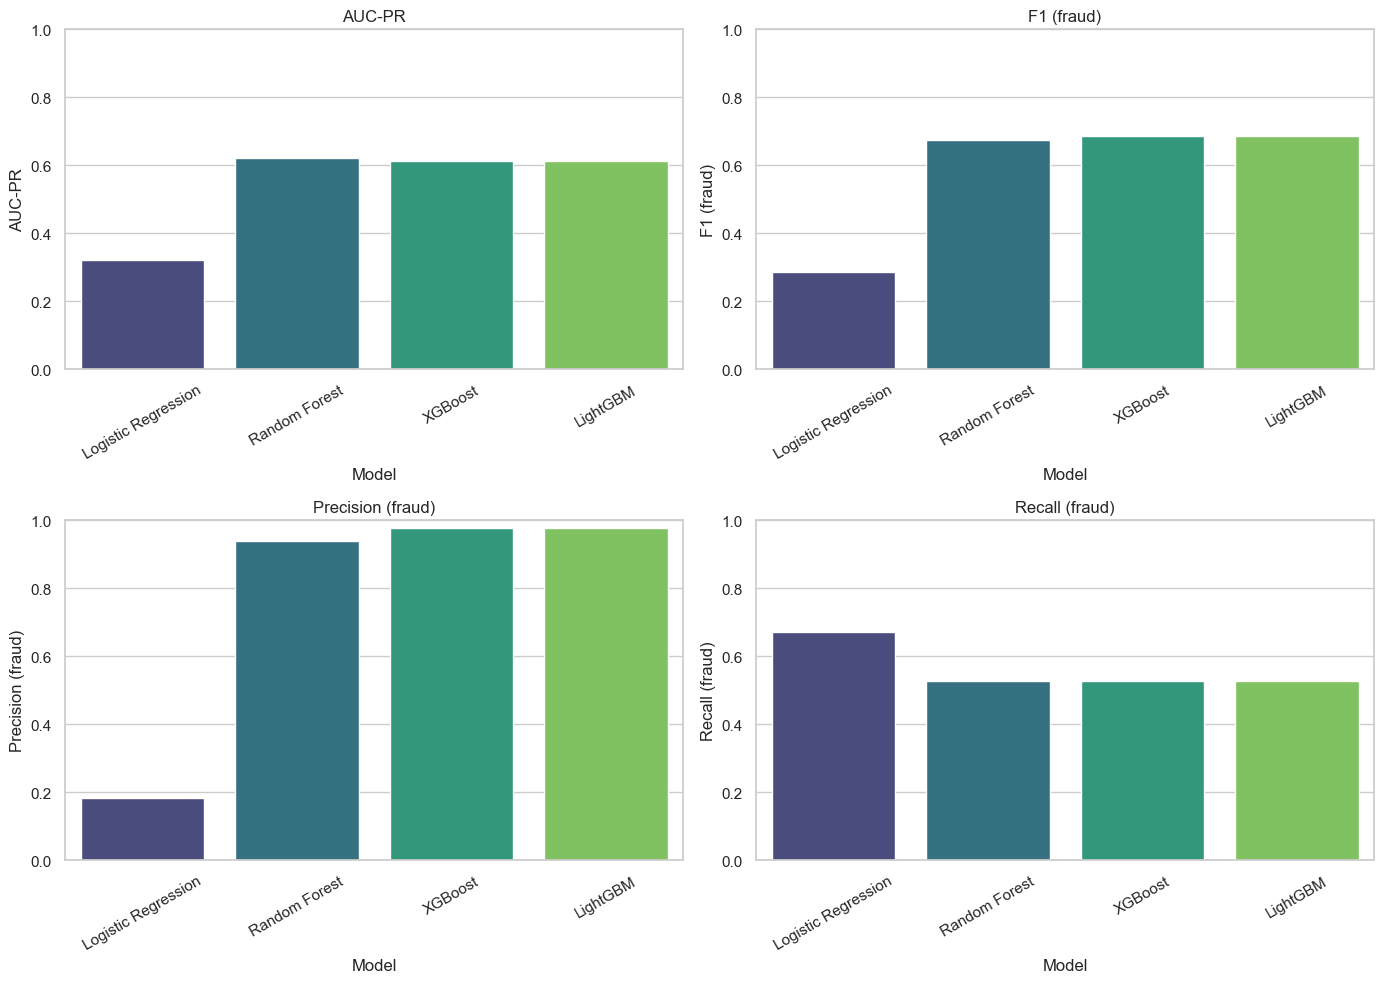

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data for all models
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'AUC-PR': [0.321, 0.622, 0.613, 0.612],
    'F1 (fraud)': [0.286, 0.676, 0.685, 0.685],
    'Precision (fraud)': [0.182, 0.940, 0.978, 0.977],
    'Recall (fraud)': [0.671, 0.528, 0.528, 0.528]
}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Plot each metric
metrics = ['AUC-PR', 'F1 (fraud)', 'Precision (fraud)', 'Recall (fraud)']

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


Model Training and Hyperparameter Tuning

In [12]:
# Hyperparameter tuning for LightGBM
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(LGBMClassifier(random_state=42),
                    param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best F1:", grid.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 11321, number of negative: 109568
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 120889, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093648 -> initscore=-2.269886
[LightGBM] [Info] Start training from score -2.269886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.7}
Best F1: 0.698038175129029
